<b>Import dependencies</b>

In [1]:
import time
import numpy 
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_utils import *
np.random.seed(1)

<b>Load dataset</b>

In [2]:
# load dataset

training_set_x_orig, training_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_data()

y = 0 and b'non-cat'


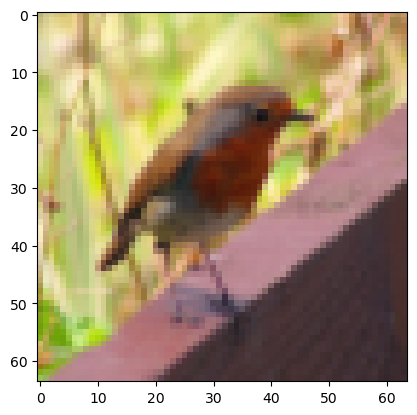

In [29]:
# check one image

index = 10
plt.imshow(training_set_x_orig[index])
print(f'y = {training_set_y_orig[0, index]} and {classes[training_set_y_orig[0, index]]}')

In [4]:
# check dataset

print(f'the training data shape: {training_set_x_orig.shape}')
print(f'the training label shape: {training_set_y_orig.shape}')
print(f'the test data shape: {test_set_x_orig.shape}')
print(f'the test label shape: {test_set_y_orig.shape}')
print(f'each training sample has {training_set_x_orig.shape[1]} pixels')
print(f'each test sample has {test_set_x_orig.shape[1]} pixels')

the training data shape: (209, 64, 64, 3)
the training label shape: (1, 209)
the test data shape: (50, 64, 64, 3)
the test label shape: (1, 50)
each training sample has 64 pixels
each test sample has 64 pixels


In [5]:
# reshape the training and test data

training_data_reshape = np.reshape(training_set_x_orig, (-1, training_set_x_orig.shape[0]))
test_data_reshape = np.reshape(test_set_x_orig, (-1, test_set_x_orig.shape[0]))

In [6]:
# check dataset

print(f'the training data shape: {training_data_reshape.shape}')
print(f'the test data shape: {test_data_reshape.shape}')

the training data shape: (12288, 209)
the test data shape: (12288, 50)


In [7]:
# preprocessing the data

training_data = training_data_reshape / 255.
test_data = test_data_reshape / 255.
training_label = training_set_y_orig
test_label = test_set_y_orig

In [8]:
# check the data
print(f'the training data:\n {training_data}')
print(f'the training label:\n {training_label}')
print(f'the test data:\n {test_data}')
print(f'the test label:\n {test_label}')

the training data:
 [[0.06666667 0.12156863 0.21960784 ... 0.26666667 0.12941176 0.16078431]
 [0.27843137 0.13333333 0.17254902 ... 0.18431373 0.30196078 0.15686275]
 [0.19215686 0.30980392 0.15686275 ... 0.14901961 0.18039216 0.29411765]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
the training label:
 [[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]
the test data:
 [[0.61960784 0.40784314 0.3254902  ... 0.36470588 0.64313725 0.4392

In [9]:
# and the shape

print(f'the training data:\n {training_data.shape}')
print(f'the training label:\n {training_label.shape}')
print(f'the test data:\n {test_data.shape}')
print(f'the test label:\n {test_label.shape}')

the training data:
 (12288, 209)
the training label:
 (1, 209)
the test data:
 (12288, 50)
the test label:
 (1, 50)


In [10]:
# number of dataset

print(f'there are {training_data.shape[1]} training data in total')
print(f'there are {test_data.shape[1]} test data in total')

there are 209 training data in total
there are 50 test data in total


<b>Build a two-layer neural network</b>

In [23]:
# the constants that define neural network architecture

n_x = 12288
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.01
num_iterations = 2500

In [24]:
def two_layer_model(X, Y, layers_dims, learning_rate, num_iterations):
    '''
    using the helper functions from dnn_utils to implement a two layer neural network
    
    Args:
    X -- training data
    Y -- training label
    layers_dims -- layer infos
    learning_rate -- learning rate alpha
    num_iterations -- num iterations
    '''
    np.random.seed(1)
    
    # prepare caches and grads
    caches = []
    grads = {}
    
    # retrieve dimensions
    n_x, n_h, n_y = layers_dims

    # init parameters 
    parameters = init_parameters(n_x, n_h, n_y)

    # retrieve parameters
    W1 = parameters['W' + str(1)]
    b1 = parameters['b' + str(1)]
    W2 = parameters['W' + str(2)]
    b2 = parameters['b' + str(2)]
    
    updated_parameters = parameters.copy()
    
    for i in range(num_iterations):
        # linear activation forward
        A1, linear_activation_cache1 = linear_activation_forward(X, W1, b1, 'relu')
        caches.append(linear_activation_cache1)
        A2, linear_activation_cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        caches.append(linear_activation_cache2)

        # compute the cost
        cost = compute_cost(Y, A2)

        # compute dloss
        dloss = -(np.divide(Y, A2) - np.divide(1-Y, 1-A2))

        # linear activation backward
        linear_activation_grads = linear_activation_backward(dloss, linear_activation_cache2, 'sigmoid')
        dW2 = linear_activation_grads['dW']
        db2 = linear_activation_grads['db']
        dA_prev1 = linear_activation_grads['dA_prev']
        grads['dW' + str(2)] = dW2
        grads['db' + str(2)] = db2
        grads['dA_prev' + str(1)] = dA_prev1
        linear_activation_grads = linear_activation_backward(dA_prev1, linear_activation_cache1, 'relu')
        dW1 = linear_activation_grads['dW']
        db1 = linear_activation_grads['db']
        dA_prev0 = linear_activation_grads['dA_prev']
        grads['dW' + str(1)] = dW1
        grads['db' + str(1)] = db1
        grads['dA_prev' + str(0)] = dA_prev0

        # update model parameters
        updated_parameters = update_params(updated_parameters, grads, learning_rate)
        
        W1 = updated_parameters['W' + str(1)]
        b1 = updated_parameters['b' + str(1)]
        W2 = updated_parameters['W' + str(2)]
        b2 = updated_parameters['b' + str(2)]
    
        if i % 100 == 0:
            print(f'the model cost: {cost} at {i+1} epoch')
        
    return updated_parameters

In [25]:
# training

best_parameters = two_layer_model(training_data, training_label, layers_dims, learning_rate, num_iterations)

the model cost: 0.6925791115138538 at 1 epoch
the model cost: 0.6349483149733486 at 101 epoch
the model cost: 0.6186792593651596 at 201 epoch
the model cost: 0.6013890861848461 at 301 epoch
the model cost: 0.5820875509573135 at 401 epoch
the model cost: 0.5606352394065434 at 501 epoch
the model cost: 0.5353630186978522 at 601 epoch
the model cost: 0.5180960716050433 at 701 epoch
the model cost: 0.5136520924287352 at 801 epoch
the model cost: 0.5083413384862406 at 901 epoch
the model cost: 0.5007783957827835 at 1001 epoch
the model cost: 0.4907915900508271 at 1101 epoch
the model cost: 0.47102846003613763 at 1201 epoch
the model cost: 0.4872579183205859 at 1301 epoch
the model cost: 0.4582359023503853 at 1401 epoch
the model cost: 0.4506716425919628 at 1501 epoch
the model cost: 0.4451584197979205 at 1601 epoch
the model cost: 0.43432532526173 at 1701 epoch
the model cost: 0.4273199023135291 at 1801 epoch
the model cost: 0.43333598372556503 at 1901 epoch
the model cost: 0.41661582410819

In [26]:
print(f'the best parameters found by neural network:\n {best_parameters}')

the best parameters found by neural network:
 {'W1': array([[ 0.01456259, -0.00500505, -0.00560462, ..., -0.00527214,
        -0.0038034 ,  0.00949412],
       [ 0.01006608,  0.00227821, -0.00664437, ...,  0.00689859,
        -0.00488322,  0.0020761 ],
       [-0.00395713, -0.00216168,  0.00692414, ...,  0.00822751,
        -0.00104425, -0.00657957],
       ...,
       [-0.00205167,  0.01222335, -0.01279997, ...,  0.00370126,
         0.01033177, -0.00896044],
       [ 0.00487913,  0.00350058, -0.00084749, ..., -0.00559281,
         0.00325022,  0.00231429],
       [ 0.00576586,  0.02492089, -0.01011163, ...,  0.0216518 ,
        -0.00842579,  0.00359795]]), 'b1': array([[ 4.34438033e-04],
       [-1.30315921e-04],
       [ 5.74055304e-04],
       [-4.74088993e-05],
       [ 2.46820062e-03],
       [ 0.00000000e+00],
       [ 2.98570464e-05]]), 'W2': array([[-0.76009424,  0.03833784, -0.38108045,  0.02807113,  0.30876863,
         0.01565835, -0.38230759]]), 'b2': array([[0.04087383]])

In [27]:
# training Acc
train_p = predict(training_data, training_label, best_parameters)

Acc 0.8708133971291865


In [28]:
# testing Acc
test_p = predict(test_data, test_label, best_parameters)

Acc 0.5000000000000001


<b>Let's try n-layer neural network</b>

In [17]:
# the constants that define neural network architecture

layers_dims = [12288, 20, 7, 5, 1]
learning_rate = 0.1
num_iterations = 2500

In [18]:
def n_layer_model(X, Y, layers_dims, learning_rate, num_iterations):
    '''
    using the helper functions from dnn_utils to implement a two layer neural network
    
    Args:
    X -- training data
    Y -- training label
    layers_dims -- layer infos
    learning_rate -- learning rate alpha
    num_iterations -- num iterations
    '''
    np.random.seed(1)
    
    # init parameters 
    parameters = init_l_layer_parameters(layers_dims)
    
    updated_parameters = parameters.copy()
    
    for i in range(num_iterations):
        # linear activation forward
        A_out, cache = l_layer_linear_activation_forward(X, updated_parameters)

        # compute the cost
        cost = compute_cost(Y, A_out)

        # linear activation backward
        grads = l_layer_linear_activation_backward(A_out, Y, cache)

        # update model parameters
        updated_parameters = update_params(updated_parameters, grads, learning_rate)
        
        if i % 100 == 0:
            print(f'the model cost: {cost} at {i+1} epoch')
    
    return updated_parameters

In [19]:
# training

best_parameters = n_layer_model(training_data, training_label, layers_dims, learning_rate, num_iterations)

the model cost: 0.693148353485136 at 1 epoch
the model cost: 0.6443934163782795 at 101 epoch
the model cost: 0.6439780046489012 at 201 epoch
the model cost: 0.643973792352469 at 301 epoch
the model cost: 0.6439737472186693 at 401 epoch
the model cost: 0.6439737453626406 at 501 epoch
the model cost: 0.6439737435076152 at 601 epoch
the model cost: 0.6439737420070566 at 701 epoch
the model cost: 0.6439737405526949 at 801 epoch
the model cost: 0.6439737394511131 at 901 epoch
the model cost: 0.6439737384479658 at 1001 epoch
the model cost: 0.6439737374868911 at 1101 epoch
the model cost: 0.6439737365672091 at 1201 epoch
the model cost: 0.6439737356603599 at 1301 epoch
the model cost: 0.6439737347740704 at 1401 epoch
the model cost: 0.643973733870355 at 1501 epoch
the model cost: 0.6439737329615748 at 1601 epoch
the model cost: 0.6439737320092712 at 1701 epoch
the model cost: 0.6439737310770397 at 1801 epoch
the model cost: 0.6439737301192403 at 1901 epoch
the model cost: 0.6439737291784948 

In [20]:
print(f'the best parameters found by neural network:\n {best_parameters}')

the best parameters found by neural network:
 {'W1': array([[ 0.01624233, -0.00611619, -0.00528016, ..., -0.00527214,
        -0.0038034 ,  0.00949412],
       [ 0.0100924 ,  0.00229743, -0.00664173, ...,  0.00689859,
        -0.00488322,  0.0020761 ],
       [-0.00356215, -0.00195484,  0.00636756, ...,  0.00822751,
        -0.00104425, -0.00657957],
       ...,
       [ 0.00174477, -0.00130072,  0.01835906, ..., -0.00922606,
        -0.00824792, -0.00153355],
       [-0.0003495 , -0.00417018, -0.0085517 , ...,  0.02247331,
        -0.00533637, -0.00029554],
       [-0.01434112, -0.01110638,  0.00726304, ...,  0.0219863 ,
         0.01538192,  0.00746604]]), 'b1': array([[ 1.71809753e-06],
       [-4.72805302e-06],
       [ 8.55869114e-07],
       [ 9.24378906e-07],
       [-3.23241460e-06],
       [ 0.00000000e+00],
       [ 3.02614456e-06],
       [-3.13521341e-06],
       [-1.55423944e-06],
       [-7.39552949e-06],
       [ 5.65888273e-06],
       [-9.70023822e-06],
       [-1.2290

In [21]:
# Acc
train_p = predict(training_data, training_label, best_parameters)

Acc 0.6555023923444976


In [22]:
# testing
test_p = predict(test_data, test_label, best_parameters)

Acc 0.3400000000000001
